---
layout: default
title: "Deep Learning - CNN- Convolution"
categories: deeplearning
permalink: /ML33/
order: 33
comments: true
---

In [1]:
%pylab --no-import-all inline
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd
import cv2
from scipy.signal import convolve2d, correlate2d

Populating the interactive namespace from numpy and matplotlib


# Computer Vision
Computer vision is one of the areas that has advanced rapidly thanks to deep learning. Many of the strategies developed specifically for image recognition have been then transferred to other tasks such as speech recognition.

Some of the main problems in computer vision are:

* image classification: tell if a picture belong to a certain class or not
* object detection: identify the presence and position of one or multiple classes of objects in a picture
* neural style transfer: apply the style of one picture to another picture

One of the main issues in computer vision ML problems is that the input $x$ can become very big. Consider a low-resolution image of $64\times 64 \mathrm{px}$, since there are three color channels we would have an input vector for image $i$, $x^{(i)} \in \mathbb{R}^{64 \cdot 64 \cdot 3 = 12288 \times 1}$ 

Consider now an high resolution picture of $1000 \times 1000 \mathrm{px}$, we would have $x^{(i)} \in \mathbb{R}^{3 \cdot 10^6 \times 1}$. Supposing that the first hidden layer of a NN has 1000 hidden units we would have $w^{(i)[1]} \in \mathbb{R}^{1000 \times 3 \cdot 10^6}$. With that many parameters is difficult to get enough data to prevent the model from overfitting and also the computational requirements are very high.

But since we want to analyze large images, we employ **convolution operations** one of the fundamental building blocks of **Convolutional neural networks**.

## Edge detection
The convolution operation is one of the fundamental building blocks of convolutional neural networks. Let's see how the convolution operation works using edge detection, one of the main tasks in computer vision, as motivating example. The convolution operation takes as input an image and a filter and produces a new image, which is the result of the convolution of the filter over the image. Some filters, can detect edges (<a href="fig:edgedet">figure below</a>), other can blur or sharpen an image.  

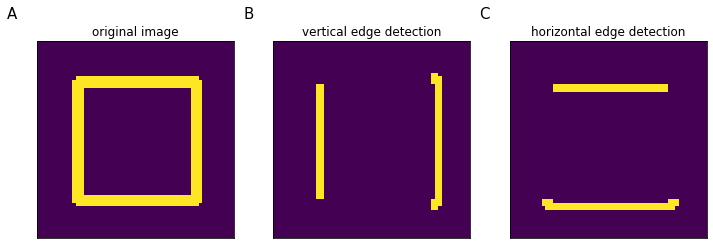

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes

canvas = np.zeros((50, 50), dtype=np.uint8)
canvas = cv2.rectangle(canvas, (10, 10), (40, 40), (255, 0, 0), 2)
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

ax1.imshow(canvas)
ax2.imshow(cv2.filter2D(canvas, -1, kernel))
ax3.imshow(cv2.filter2D(canvas, -1, kernel.T))
ax1.set_title('original image')
ax2.set_title('vertical edge detection')
ax3.set_title('horizontal edge detection')
for ax, l in zip(axes, 'ABC'):
    ax.text(-.1, 1.1, l, transform=ax.transAxes, va='bottom', ha='right', fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])

<i id="fig:edgedet">The image of a rectangle (A) and the result of applying a vertical edge-detection filter (B) and an horizontal edge-detection filter (B)</i>

The convolution operation is based on rolling a filter (sometimes called kernel) on an image. Each step taken by the filter over the image produces a single number, which results from the sum of the element-wise product between the filter values and the portion of image values covered by the filter. In the case shown in <a href="#fig:convolution">figure below</a> the filter used is a vertical edge detection filter, which is able to highlight vertical contrasting regions in a broader image.

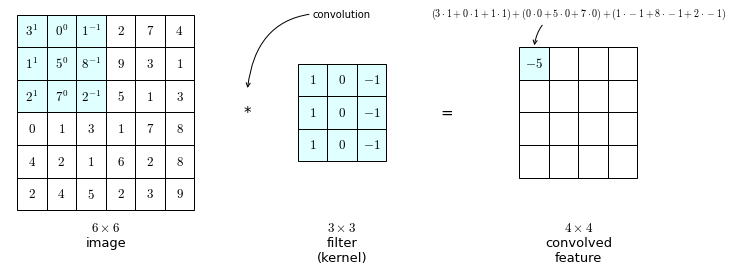

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes
fig.patch.set_visible(False)

t = np.array([['$3^1$', '$0^0$', '$1^{-1}$', '$2$', '$7$', '$4$'],['$1^1$', '$5^0$', '$8^{-1}$', '$9$', '$3$', '$1$'], 
              ['$2^1$', '$7^0$', '$2^{-1}$', '$5$', '$1$', '$3$'], ['$0$', '$1$', '$3$', '$1$', '$7$', '$8$'],
              ['$4$', '$2$', '$1$', '$6$', '$2$', '$8$'], ['$2$', '$4$', '$5$', '$2$', '$3$', '$9$']])
texify = lambda n, sup=None: '${}{}$'.format(n, '^{{{}}}'.format(sup) if sup else '')
c = [['lightcyan', 'lightcyan', 'lightcyan', 'none', 'none', 'none'],['lightcyan', 'lightcyan', 'lightcyan', 'none', 'none', 'none'],['lightcyan', 'lightcyan', 'lightcyan', 'none', 'none', 'none'],['none', 'none', 'none', 'none', 'none', 'none'], ['none', 'none', 'none', 'none', 'none', 'none'], ['none', 'none', 'none', 'none', 'none', 'none']]
tab1 = ax1.table(t, loc='center', colWidths=[0.05]*6, cellLoc='center', cellColours=c)
tab1.auto_set_font_size(False)
tab1.set_fontsize(13)
tab1.scale(3, 3)
ax1.text(0.5, -.05, '$6\\times 6 $\nimage', va='top', ha='center', transform=ax1.transAxes, fontsize=13)

tab2 = ax2.table([['$1$', '$0$', '$-1$'] for _ in range(3)], loc='center', colWidths=[0.05]*3, 
                 cellLoc='center', cellColours=[['lightcyan', 'lightcyan', 'lightcyan'] for _ in range(3)])
tab2.scale(3, 3)
tab2.auto_set_font_size(False)
tab2.set_fontsize(13)
t = ax2.text(0, 0.5, '*', va='center', ha='left', transform=ax2.transAxes, fontsize=15)
ax2.text(0.5, -.05, '$3\\times 3$\nfilter\n(kernel)', va='top', ha='center', transform=ax2.transAxes, fontsize=13)
ax2.annotate('convolution', (.5, 2), (0.5, 1), xycoords=t, textcoords=ax2.transAxes, va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.5', arrowstyle="->"))

c = [['lightcyan', *['none']*3], *[['none']*4]*3]
tab3 = ax3.table([['$-5$', '', '', ''], *[['', '', '', '']]*3 ], loc='center', colWidths=[0.05]*4, cellLoc='center', cellColours=c)
tab3.scale(3, 3)
tab3.auto_set_font_size(False)
tab3.set_fontsize(13)
t = ax3.text(-.2, 0.5, '=', va='center', ha='left', transform=ax3.transAxes, fontsize=15)
ax3.annotate('$(3\cdot1+0\cdot1+1\cdot1)+(0\cdot0+5\cdot0+7\cdot0)+(1\cdot-1+8\cdot-1+2\cdot-1)$', (1/8, 1), (0.5, 1), 
             xycoords=tab3, textcoords=ax3.transAxes, va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.5', arrowstyle="->"))
ax3.text(0.5, -.05, '$4\\times 4 $\nconvolved\nfeature', va='top', ha='center', transform=ax3.transAxes, fontsize=13)

for ax in axes:
    ax.axis('off')
    ax.axis('tight')
    ax.set_aspect('equal')

<i id="fig:convolution">One step of convolution of a $3\times 3$ vertical edge detection filter over a $6 \times 6$ image, resulting in a $4 \times 4$ convolved feature.</i>

Why is the kernel in <a href="#fig:convolution">the figure above</a> is doing vertical edge detection? Let's take a simple $6 \times 6$ image where half of it is bright (high values) and the other half is dark (low values) (<a href="#fig:vertedgedet">figure below</a>, panel A). In this image there is a strong vertical edge in the middle as it transitions from bright to dark. By applying the vertical edge detection filter we obtain an image with a bright vertical line in the middle, brighter, in fact, than the bright color in the input image. And so, the convolution it successfully detected the position and highlighted the vertical edge in the input image.

Convolving the same kernel with a mirrored input image (<a href="#fig:vertedgedet">figure below</a>, panel B) results in an image where the values of the detected portion are negative. The fact that the detected edge is dark indicates that in the input image there is a **dark-to-light transition**, while in the previous image the bright detection indicates that in the input image there was a **light-to-dark-transition**.

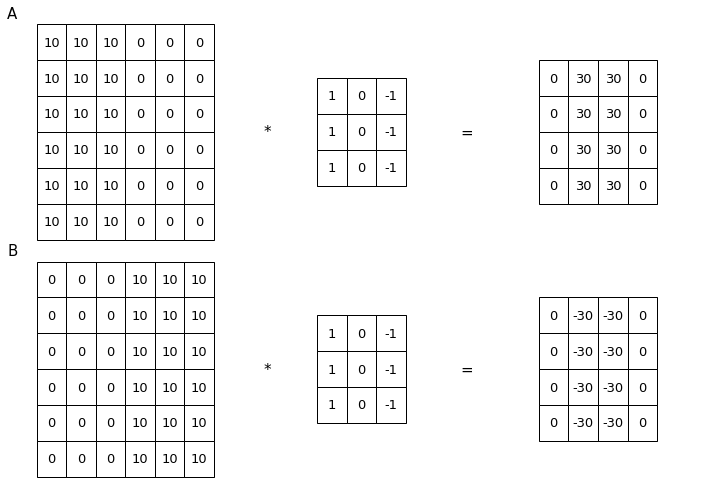

In [4]:
canvas = np.hstack([np.ones((6, 3)), np.zeros((6, 3))])*10
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])


cv2.filter2D(canvas, -1, kernel)
dst = correlate2d(canvas, kernel, mode='valid')


fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.ravel()
fig.patch.set_visible(False)
tabs = []
tabs.append(ax1.table(canvas.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax2.table(kernel.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax3.table(dst.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
t = ax2.text(0, 0.5, '*', va='center', ha='left', transform=ax2.transAxes, fontsize=15)
t = ax3.text(-.2, 0.5, '=', va='center', ha='left', transform=ax3.transAxes, fontsize=15)
dst = convolve2d(kernel, canvas, mode='valid')
tabs.append(ax4.table(canvas.astype(int)[:, ::-1], loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax5.table(kernel.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax6.table(dst.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
t = ax5.text(0, 0.5, '*', va='center', ha='left', transform=ax5.transAxes, fontsize=15)
t = ax6.text(-.2, 0.5, '=', va='center', ha='left', transform=ax6.transAxes, fontsize=15)
ax1.text(-.1, 1.1, 'A', va='center', ha='left', transform=ax1.transAxes, fontsize=15)
ax4.text(-.1, 1.1, 'B', va='center', ha='left', transform=ax4.transAxes, fontsize=15)


for ax, tab in zip(axes.ravel(), tabs):
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(3, 3)
    ax.axis('off')
    ax.axis('tight')
    ax.set_aspect('equal')

<i id="fig:vertedgedet">Vertical edge detection applied to an image with its left half bright and its right half dark (A), and to its mirrored version (B)</i>

We can easily imagine that an **horizontal filter** is just a transposed version of the vertical filter that we have seen until now. In reality, many different filters exist that perform a number of operations.

### Caveat on convolution vs cross-correlation
In strict mathematical terms, the operation that we have described is not convolution and should by rigor be called cross-correlation. The reason why, strictly speaking the operation described is not convolution is because it is missing a step. When performing convolutions, before rolling the kernel over the input image, the kernel is flipped (<a href="#fig:kernelflip">figure below</a>). This operation ensures the associate property of convolutions where $(A \cdot B) \cdot C = A \cdot (B \cdot C)$. The associative property however, is not required in deep neural networks and for this reason the step is skipped to make the computations easier.

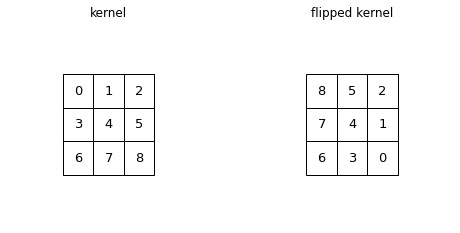

In [5]:
kernel = np.arange(9).reshape(3,3)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax1, ax2 = axes
fig.patch.set_visible(False)
tabs = []
tabs.append(ax1.table(kernel.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax2.table(kernel[::-1, ::-1].T.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
ax1.set_title('kernel')
ax2.set_title('flipped kernel')

for ax, tab in zip(axes.ravel(), tabs):
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(3, 3)
    ax.axis('off')
    ax.axis('tight')
    ax.set_aspect('equal')

<i id="fig:kernelflip">Flipping step of a kernel required to ensure the associative property of convolutions</i>

## Learning to detect edges
The vertical filter we have seen is just one of many vertical filters. There has been a fair amount of discussion in the computer vision community on which is the best filter for vertical edge detection. Many filters have been handcrafted to satisfy a variety of needs (not only vertical edge detection) like for example the Sobel filter (<a href="#fig:filters">figure below</a>, panel A) or the Scharr filter (<a href="#fig:filters">figure below</a>, panel B). The deep learning era gave birth to the idea that instead of manually designing filters, the 9 numbers composing the filters could be treated as a matrix of parameters and learned with the back-propagation process on the basis of desired results (<a href="#fig:filters">figure below</a>, panel C).

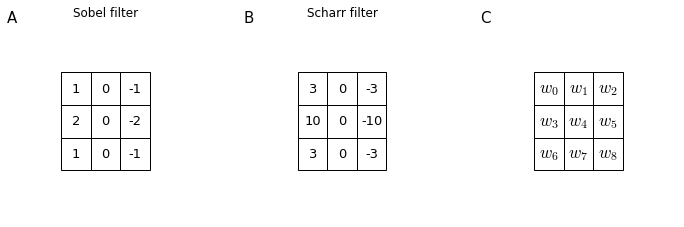

In [6]:
sobel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

scharr = np.array([[3, 0, -3],
                   [10, 0, -10],
                   [3, 0, -3]])

params = np.array(['$w_{}$'.format(i) for i in range(9)]).reshape(3, 3)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes
fig.patch.set_visible(False)
tabs = []
tabs.append(ax1.table(sobel.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax2.table(scharr.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax3.table(params, loc='center', colWidths=[0.05]*6, cellLoc='center'))
ax1.set_title('Sobel filter')
ax2.set_title('Scharr filter')

for ax, tab, l in zip(axes.ravel(), tabs, 'ABC'):
    ax.text(0, 1, l, transform=ax.transAxes, fontsize=15)
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(3, 3)
    ax.axis('off')
    ax.axis('tight')
    ax.set_aspect('equal')
    
tabs[2].set_fontsize(17)

<i id="fig:filters">Two hand designed filters, the Sobel (A) and Scharr (B) filters, and a filter made of the learned parameters (C)</i>

## Padding
In order to build convolutional neural network we need to modify the process of convolution that we have seen up to this point and add **padding**. The convolution process as we know it takes as input an $n \times n$ image and convolve it with a $f \times f$ filter to produce a $(n-f+1) \times (n-f+1)$ output. For example, a $6 \times 6$ image with a $3 \times 3$ filter produces a $4 \times 4$ output. This is because the filter can only explore $4 \times 4$ position in the input image without one of its cell going outside of the image.

The two downside to this are:

* each time you apply convolution your image shrinks
* pixels along the edges and especially pixels in the corners are used much fewer times (contribute less to the output) than pixels in the middle.

With padding, a border of one unit is added to the image so that the side becomes $n+2p$, where $p$ is the amount of padding applied. This allows the filter to move freely on the edge cells, preserving the original dimensions of the input image on the convolution result (<a href="#fig:padding">figure below</a>).

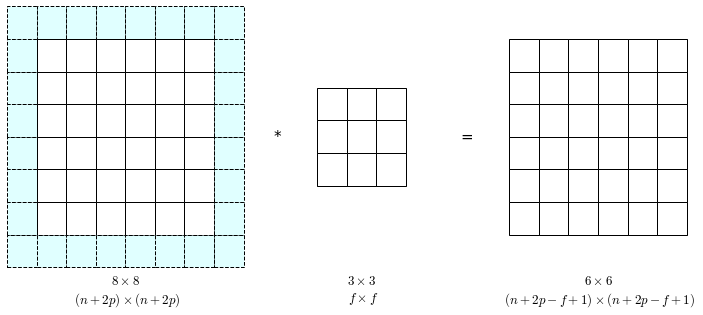

In [7]:
canvas = np.array(list(' '*64)).reshape(8, 8)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes.ravel()
fig.patch.set_visible(False)
tabs = []
tabs.append(ax1.table(canvas, loc='center', colWidths=[0.05]*8, cellLoc='center'))
tabs.append(ax2.table(np.array(list(' '*9)).reshape(3, 3), loc='center', colWidths=[0.05]*6, cellLoc='center'))
tabs.append(ax3.table(np.array(list(' '*36)).reshape(6, 6), loc='center', colWidths=[0.05]*6, cellLoc='center'))
t = ax2.text(0.05, 0.5, '*', va='center', ha='left', transform=ax2.transAxes, fontsize=15)
t = ax3.text(-.2, 0.5, '=', va='center', ha='left', transform=ax3.transAxes, fontsize=15)
ax1.text(0.5, -.2, '$8\\times 8 $\n $(n+2p) \\times (n+2p)$', va='top', ha='center', transform=ax1.transAxes, fontsize=13)
ax2.text(0.5, -.2, '$3\\times 3$\n $f \\times f$', va='top', ha='center', transform=ax2.transAxes, fontsize=13)
ax3.text(0.5, -.2, '$6\\times 6 $\n $(n+2p-f+1) \\times (n+2p-f+1)$', va='top', ha='center', transform=ax3.transAxes, fontsize=13)



for ax, tab in zip(axes.ravel(), tabs):
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(3, 3)
    ax.axis('off')
    ax.axis('tight')
    ax.set_aspect('equal')

canvas = tabs[0].get_celld()
for i in range(8):
    for j in range(8):
        canvas[i, j].set_linestyle('--')
        canvas[i, j].set_facecolor('lightcyan')

for i in range(1, 7):
    for j in range(1, 7):
        canvas[i, j].set_linestyle('-')
        canvas[i, j].set_facecolor('w')

<i id="fig:padding">A $6 \times 6$ image padded to $8 \times 8$, convoluted with a $3 \times 3$ filter to produce a $6 \times 6$ output image that preserves the original dimension of the input image.</i>

There are two common choices of the amount of padding applied during convolutions, they are called **valid convolutions** and **same convolutions**.

* Valid: no padding $p=0$
* Same: set the padding size $p$ so that the output size is the same as the input size. In order for this requirement to be satisfied:

$$n+2p - f + 1 = n \qquad \Rightarrow \qquad p = \frac{f-1}{2}$$

This works because the filter, by convention, has always odd dimensions. The reason behind this decision is to have symmetric filtering and to have a central cell of the filter.

## Stride
Strided convolution is another fundamental building block for implementing convolutional neural networks. The **stride** ($s$) of a convolution, is the amount of cell traveled by the kernel each step of its movement across the input image. The convolutions that we have seen until now all had a stride of 1. When the stride = 2, the kernel will skip one cell in traveling east and will also skip one cell in traveling south, this means that, with a *valid padding* ($p=0$), the output image will have each side of dimension $\lfloor \frac{n+2p-f}{s}+1 \rfloor$, where $\lfloor z \rfloor $ denotes the floor approximation of $z$. For a $7 \times 7$ input image convoluted with a $3 \times 3$ kernel, a stride = 2 will produce a $3 \times 3$ output image (<a href="fig:stride">figure below</a>).

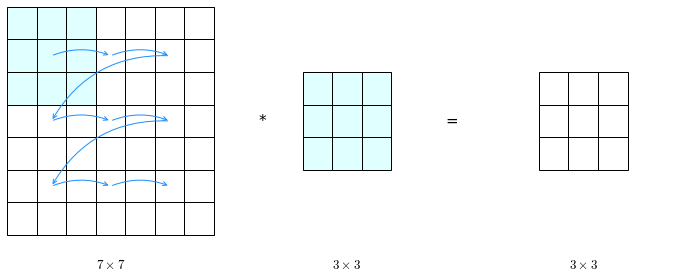

In [8]:
canvas = np.array(list(' '*49)).reshape(7, 7)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes.ravel()
fig.patch.set_visible(False)
tabs = []
tabs.append(ax1.table(canvas, loc='center', colWidths=[0.05]*7, cellLoc='center'))
tabs.append(ax2.table(np.array(list(' '*9)).reshape(3, 3), loc='center', colWidths=[0.05]*6, cellLoc='center', cellColours=np.array(['lightcyan']*9).reshape(3, 3)))
tabs.append(ax3.table(np.array(list(' '*9)).reshape(3, 3), loc='center', colWidths=[0.05]*3, cellLoc='center'))
t = ax2.text(0.05, 0.5, '*', va='center', ha='left', transform=ax2.transAxes, fontsize=15)
t = ax3.text(-.2, 0.5, '=', va='center', ha='left', transform=ax3.transAxes, fontsize=15)
ax1.text(0.5, -.2, '$7\\times 7 $', va='top', ha='center', transform=ax1.transAxes, fontsize=13)
ax2.text(0.5, -.2, '$3\\times 3$', va='top', ha='center', transform=ax2.transAxes, fontsize=13)
ax3.text(0.5, -.2, '$3\\times 3$', va='top', ha='center', transform=ax3.transAxes, fontsize=13)

for ax, tab in zip(axes.ravel(), tabs):
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(3, 3)
    ax.axis('off')
    ax.axis('tight')
    ax.set_aspect('equal')
    
ec = 'dodgerblue'
ax1.annotate('', (3/14, 11/14), (7/14, 11/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.2', arrowstyle="<-", edgecolor=ec))
ax1.annotate('', (7/14, 11/14), (11/14, 11/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.2', arrowstyle="<-", edgecolor=ec))
ax1.annotate('', (3/14, 7/14), (7/14, 7/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.2', arrowstyle="<-", edgecolor=ec))
ax1.annotate('', (7/14, 7/14), (11/14, 7/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.2', arrowstyle="<-", edgecolor=ec))
ax1.annotate('', (3/14, 3/14), (7/14, 3/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.2', arrowstyle="<-", edgecolor=ec))
ax1.annotate('', (7/14, 3/14), (11/14, 3/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=.2', arrowstyle="<-", edgecolor=ec))
ax1.annotate('', (11/14, 11/14), (3/14, 7/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=-.3', arrowstyle="<-", edgecolor=ec))
ax1.annotate('', (11/14, 7/14), (3/14, 3/14), xycoords=tabs[0], textcoords=tabs[0], va='center', ha='center', arrowprops=dict(connectionstyle='arc3,rad=-.30', arrowstyle="<-", edgecolor=ec))

canvas = tabs[0].get_celld()
for i in range(3):
    for j in range(3):
        canvas[i, j].set_facecolor('lightcyan')

<i id="fig:stride">The result of a strided convolution on a $7 \times 7$ input image</i>

## Convolutions over volumes
Until now, we have seen convolutions over grayscale images. Grayscale images can be represented as 2D arrays where each value is the intensity (or gradation) of gray. Suppose that we want to apply convolution on RGB images, which are composed of three layers (channels) of values. We will need to deal with 3D arrays, for example a $6 \times 6$ image will become a $6 \times 6 \times 3$ image. By convention the third dimension is called **channels** (as in the RGB channels of an image) or **depth**. By convention, the filter has the same number of channels as the input image, which might be a $3 \times 3 \times 3$ filter. This convolution will produce a 2D $4 \times 4$ image. (<a href="#fig:volconv">figure below</a>).

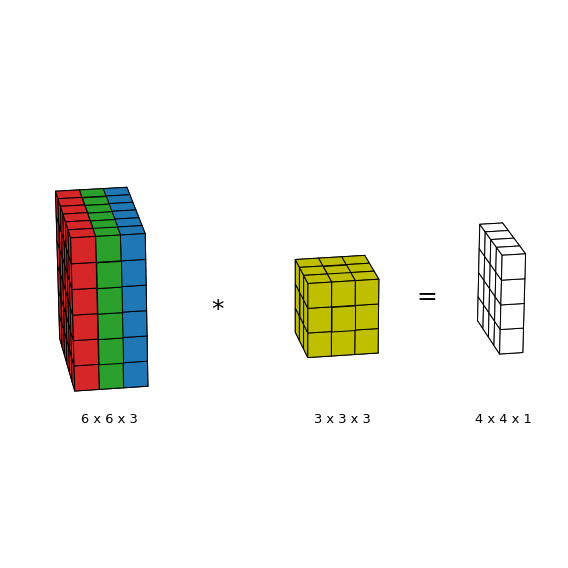

In [10]:
# prepare some coordinates
x, y, z = np.indices((6, 19, 6))

# draw cuboids in the top left and bottom right corners, and a link between them
r = (x < 6) & (y == 0) & (z < 6)
g = (x < 6) & (y == 1) & (z < 6)
b = (x < 6) & (y == 2) & (z < 6)

k = (x > 0) & (x < 4) & (9 < y) & (y < 13) & (z < 3)
o = (x > 0) & (x < 5) & (y == 18) & (z < 4)

# combine the objects into a single boolean array
voxels = r | g | b | k | o

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C3'
colors[g] = 'C2'
colors[b] = 'C0'
colors[k] = 'y'
colors[o] = 'w'

# and plot everything
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
ax.set_axis_off()
ax.view_init(elev=20, azim=-10)
ax.voxels(voxels, edgecolor='k', facecolors=colors, shade=False);
ax.set_box_aspect([6, 19, 6])
ax.text(2, 6.5, 1.5, '*', fontsize=25, va='center', ha='center')
ax.text(2, 15.5, 1.5, '=', fontsize=25, va='center', ha='center')
fig.tight_layout()
ax.text2D(3.5/19, .25, '6 x 6 x 3', transform=ax.transAxes, ha='center', fontsize=13)
ax.text2D(11.5/19, .25, '3 x 3 x 3', transform=ax.transAxes, ha='center', fontsize=13)
ax.text2D(17/19, .25, '4 x 4 x 1', transform=ax.transAxes, ha='center', fontsize=13);

<i id="fig:volconv">A simple example of convolution over volume, Where a 3D input and 3D filter produce a 2D output</i>

### Values in filter channels
Since the kernel has the same number of channels as the input image, it will convolve only in two directions, producing a 2D output image. The content of each channel of the 3D channel can be different. For example you could apply a vertical edge detection to the Red channel and not to the other channels (<a href="#fig:3dkernel">figure below</a>).

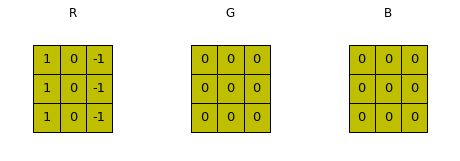

In [37]:
sobel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

zero = np.zeros_like(sobel)

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax1, ax2, ax3 = axes
fig.patch.set_visible(False)
tabs = []
tabs.append(ax1.table(sobel.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center', cellColours=np.array(list('y'*9)).reshape(3, 3)))
tabs.append(ax2.table(zero.astype(int), loc='center', colWidths=[0.05]*6, cellLoc='center', cellColours=np.array(list('y'*9)).reshape(3, 3)))
tabs.append(ax3.table(zero, loc='center', colWidths=[0.05]*6, cellLoc='center', cellColours=np.array(list('y'*9)).reshape(3, 3)))
ax1.set_title('R')
ax2.set_title('G')
ax3.set_title('B')

for ax, tab, l in zip(axes.ravel(), tabs, 'ABC'):
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(4, 4)
    ax.axis('off')
    ax.axis('tight')
    ax.set_aspect(1)

<i id="fig:3dkernel">The Red, Green and Blue channels of a 3D kernel. This filter detects vertical edges only in the Red channel</i>

### Multiple filters
A 3 channels input image can be convoluted with multiple 3-channels filters at the same time. This produces as many output channels as the number of filters convoluted (<a href="#fig:multifilter">figure below</a>). The ability to convolve multiple filters over the same input to produce multi-channel output is one of the fundamental blocks of CNNs. Each filter, can be considered a feature that gets trained during optimization. Instead of just applying vertical edge detection, a CNN can learn to apply vertical, orizontal, diagonal edge detection all at the same time.

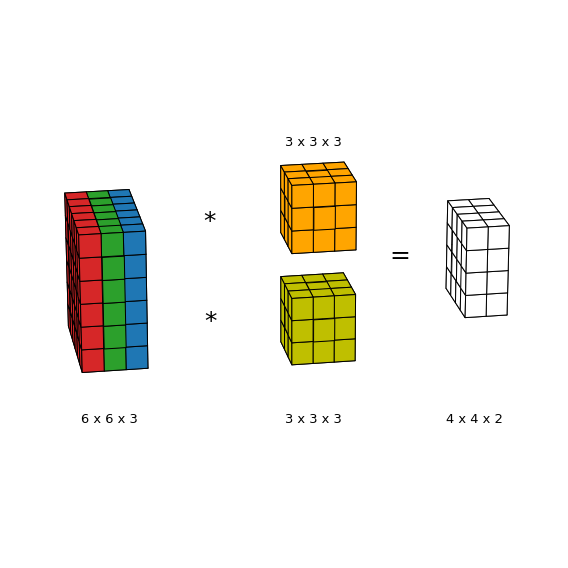

In [113]:
# prepare some coordinates
x, y, z = np.indices((8, 20, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
r = (x < 6) & (y == 0) & (z > 0) & (z < 7)
g = (x < 6) & (y == 1) & (z > 0) & (z < 7)
b = (x < 6) & (y == 2) & (z > 0) & (z < 7)

k = (x > 0) & (x < 4) & (9 < y) & (y < 13) & (z < 3)
k2 = (x > 0) & (x < 4) & (9 < y) & (y < 13) & (z > 4) & (z < 8)
o = (x > 0) & (x < 5) & (y > 17) & (y < 20) & (z > 1) & (z < 6)

# combine the objects into a single boolean array
voxels = r | g | b | k | o | k2

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C3'
colors[g] = 'C2'
colors[b] = 'C0'
colors[k] = 'y'
colors[k2] = 'orange'
colors[o] = 'w'

# and plot everything
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.set_axis_off()
ax.view_init(elev=20, azim=-10)
ax.voxels(voxels, edgecolor='k', facecolors=colors, shade=False);
ax.set_box_aspect([8, 20, 8])
ax.text(2, 6.5, 1.5, '*', fontsize=25, va='center', ha='center')
ax.text(2, 6.5, 6, '*', fontsize=25, va='center', ha='center')
ax.text(2, 15.5, 4, '=', fontsize=25, va='center', ha='center')
fig.tight_layout()
ax.text2D(3.5/19, .25, '6 x 6 x 3', transform=ax.transAxes, ha='center', fontsize=13)
ax.text2D(10.5/19, .25, '3 x 3 x 3', transform=ax.transAxes, ha='center', fontsize=13)
ax.text2D(10.5/19, .75, '3 x 3 x 3', transform=ax.transAxes, ha='center', fontsize=13)
ax.text2D(16/19, .25, '4 x 4 x 2', transform=ax.transAxes, ha='center', fontsize=13);

<i id="fig:multifilter">Two filters convoluted with a single input image produce a 2-channels output image</i>